## あらゆる確率分布において，サンプル平均は正規分布で近似できる．

あるサンプルから抽出した身長を確率変数を$$X_1,...,X_n$$とする．
$$\sqrt(n)(\frac{1}{n}\sigma_{i=1}^n X_i -\mu)$$ -> 平均0の正規分布になる．   

## モチベーションは以下の動画を見て　

https://youtu.be/vcruS8hYrUg?t=2496

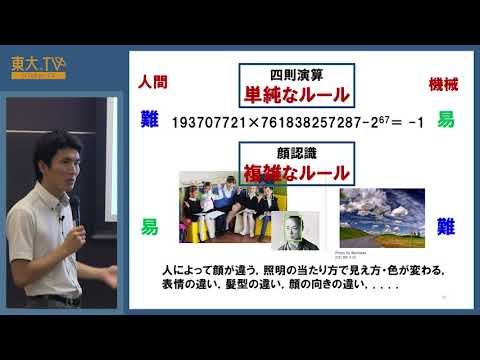

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("vcruS8hYrUg",start=2496)#スタート位置は指定しているので再生するだけ

## 数値実験

In [39]:
using Plots

height = [167,161,180,158,167,187,172,175,169,177,173,174,178,182,164,163,155,156,178,175,174,156,178,180,173,155,166,171.173,174,182,179,183,191,166,161,163,177,172]
n = length(height)
μ = sum(height)/n
v = var(height)

array = Float32[]

function center_limit()
    anim = @animate for i in 1:n
        push!(array, (√i*(((1/i)*sum(height[1:i])-μ))))
        histogram(array,title="Central limit theorem n = $i",legend=false)
    end
    gif(anim, "center.gif", fps = 100)
end

center_limit()


┌ Info: Saved animation to 
│   fn = /Users/noriakioshita/Github/julia/ml_page/julia/center.gif
└ @ Plots /Users/noriakioshita/.julia/packages/Plots/ex9On/src/animation.jl:90


Plots.AnimatedGif("/Users/noriakioshita/Github/julia/ml_page/julia/center.gif")


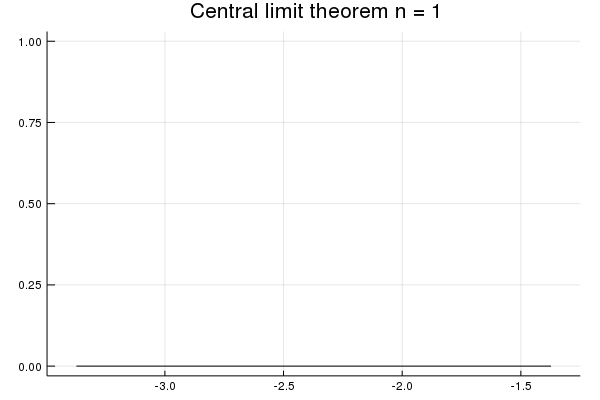

Add `using Base64` to your imports.
  likely near /Users/noriakioshita/.julia/packages/IJulia/9RcVi/src/kernel.jl:32
Add `using Base64` to your imports.
  likely near /Users/noriakioshita/.julia/packages/IJulia/9RcVi/src/kernel.jl:32
Add `using Base64` to your imports.
  likely near /Users/noriakioshita/.julia/packages/IJulia/9RcVi/src/kernel.jl:32


In [15]:
display_img(mimetype, file) = open(file) do f
    base64text = base64encode(f)
    display("text/html", """<img src="data:$mimetype;base64,$base64text">""")
end

display_img("image/gif", "center.gif")

## nが無限大に近づくと分散√v,平均0の正規分布に近づくと思います．
## 図ではデータが少ないので上手く正規分布になっていないと考えられます．

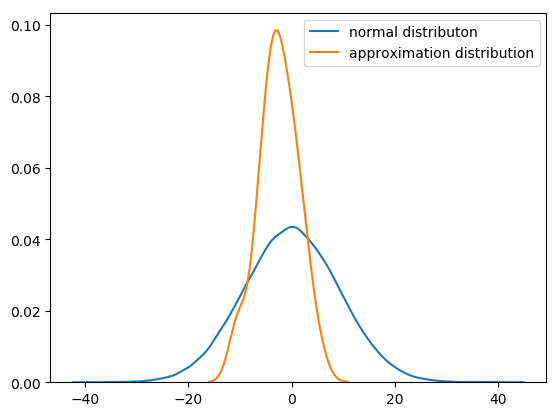

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x1a54734ef0>

In [62]:
using Seaborn
using Distributions

# ｖはσ^2になっているので√を掛ける
X = rand(Normal(0,√v), 100000)
kdeplot(X,label="normal distributon")
kdeplot(array,label="approximation distribution")